<center><h1> Random forest </h1></center>

# 1. Information

https://archive.ics.uci.edu/ml/datasets/Car+Evaluation  
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.  

Attribute Information:
Class Values:
unacc, acc, good, vgood
Attributes:  
* buying: vhigh, high, med, low.  
* maint: vhigh, high, med, low.  
* doors: 2, 3, 4, 5more.  
* persons: 2, 4, more.  
* lug_boot: small, med, big.  
* safety: low, med, hig  

# 2. Fetching Data:

## 2.1 Import packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
import math
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

## 2.2 Import data

In [2]:
data=pd.read_csv("car.data", names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car_class'])

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,car_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
cur_class_values=data['car_class'].value_counts()
cur_class_values

unacc    1210
acc       384
good       69
vgood      65
Name: car_class, dtype: int64

# 3. EDA

## 3.1 Buying variable

In [5]:
buying_values = data['buying'].value_counts()
buying_values

vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64

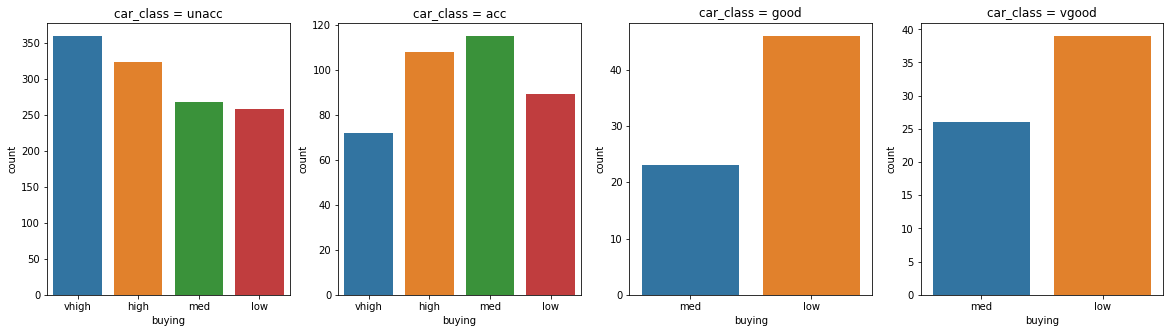

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for cur_val, subplot in zip(list(cur_class_values.index), ax):
    subplot.set_title('car_class = '+cur_val)
    sns.catplot(x='buying', kind='count', data=data.loc[data['car_class']==cur_val], ax = subplot)
    plt.close()

In [7]:
def buying_trans (x):
    if (x=='vhigh'):
        return 4
    elif (x=='high'):
        return 3
    elif (x=='med'):
        return 2
    elif (x=='low'):
        return 1
    else:
        return np.nan

In [8]:
data['buying'] = data['buying'].apply(buying_trans)

## 3.2 Maint variable

In [9]:
data['maint'].value_counts()

vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64

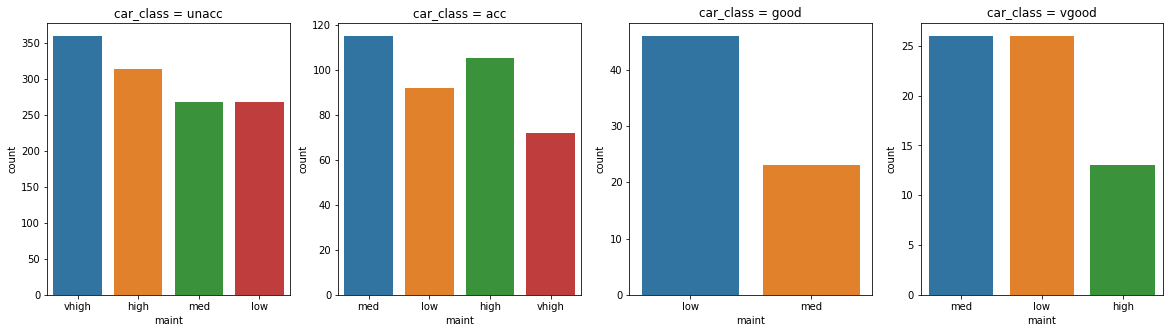

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for cur_val, subplot in zip(list(cur_class_values.index), ax):
    subplot.set_title('car_class = '+cur_val)
    sns.catplot(x='maint', kind='count', data=data.loc[data['car_class']==cur_val], ax = subplot)
    plt.close()

In [11]:
def maint_trans (x):
    if (x=='vhigh'):
        return 4
    elif (x=='high'):
        return 3
    elif (x=='med'):
        return 2
    elif (x=='low'):
        return 1
    else:
        return np.nan

In [12]:
data['maint'] = data['maint'].apply(maint_trans)

## 3.3 Doors variable

In [13]:
data['doors'].value_counts()

4        432
5more    432
3        432
2        432
Name: doors, dtype: int64

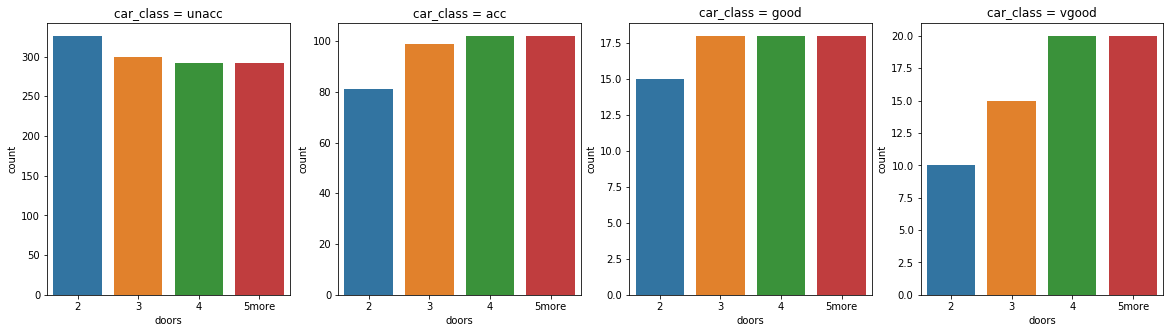

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for cur_val, subplot in zip(list(cur_class_values.index), ax):
    subplot.set_title('car_class = '+cur_val)
    sns.catplot(x='doors', kind='count', data=data.loc[data['car_class']==cur_val], ax = subplot)
    plt.close()

In [15]:
def doors_trans (x):
    if (x=='5more'):
        return 4
    elif (x=='4'):
        return 3
    elif (x=='3'):
        return 2
    elif (x=='2'):
        return 1
    else:
        return np.nan

In [16]:
data['doors'] = data['doors'].apply(doors_trans)

## 3.4 Persons variables

In [17]:
data['persons'].value_counts()

4       576
more    576
2       576
Name: persons, dtype: int64

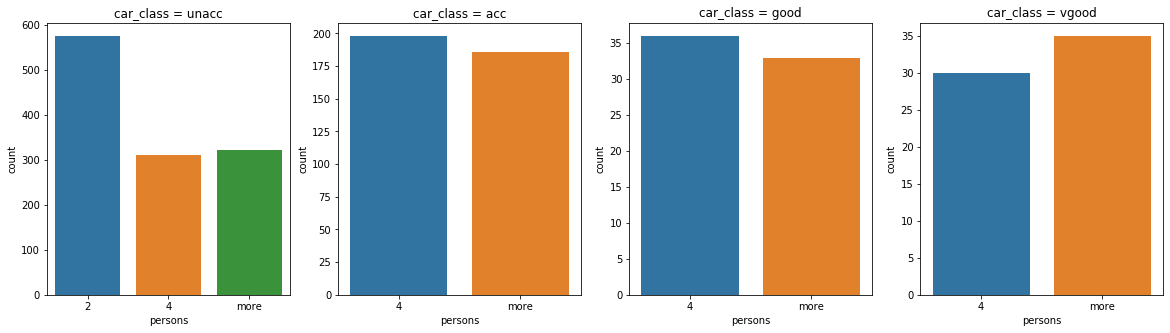

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for cur_val, subplot in zip(list(cur_class_values.index), ax):
    subplot.set_title('car_class = '+cur_val)
    sns.catplot(x='persons', kind='count', data=data.loc[data['car_class']==cur_val], ax = subplot)
    plt.close()

In [19]:
def persons_trans (x):
    if (x=='more'):
        return 3
    elif (x=='4'):
        return 2
    elif (x=='2'):
        return 1
    else:
        return np.nan

In [20]:
data['persons'] = data['persons'].apply(persons_trans)

## 3.5 Lug_boot variables

In [21]:
data['lug_boot'].value_counts()

big      576
small    576
med      576
Name: lug_boot, dtype: int64

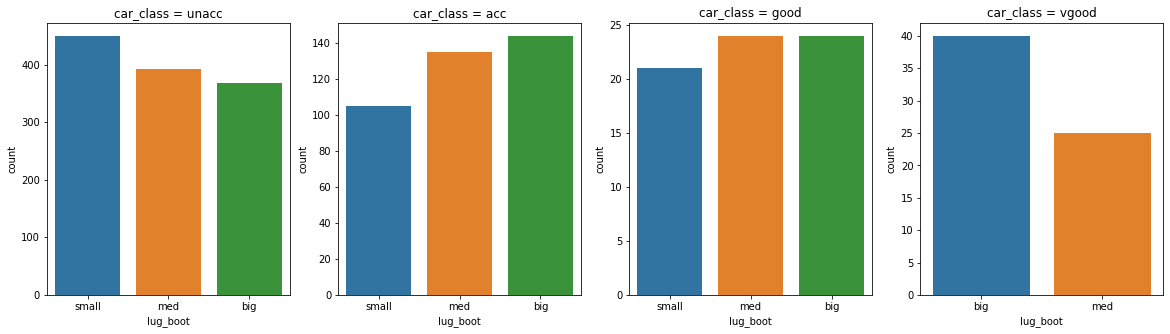

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for cur_val, subplot in zip(list(cur_class_values.index), ax):
    subplot.set_title('car_class = '+cur_val)
    sns.catplot(x='lug_boot', kind='count', data=data.loc[data['car_class']==cur_val], ax = subplot)
    plt.close()

In [23]:
def lug_boot_trans (x):
    if (x=='big'):
        return 3
    elif (x=='med'):
        return 2
    elif (x=='small'):
        return 1
    else:
        return np.nan

In [24]:
data['lug_boot'] = data['lug_boot'].apply(lug_boot_trans)

## 3.6 Safety variable

In [25]:
data['safety'].value_counts()

low     576
high    576
med     576
Name: safety, dtype: int64

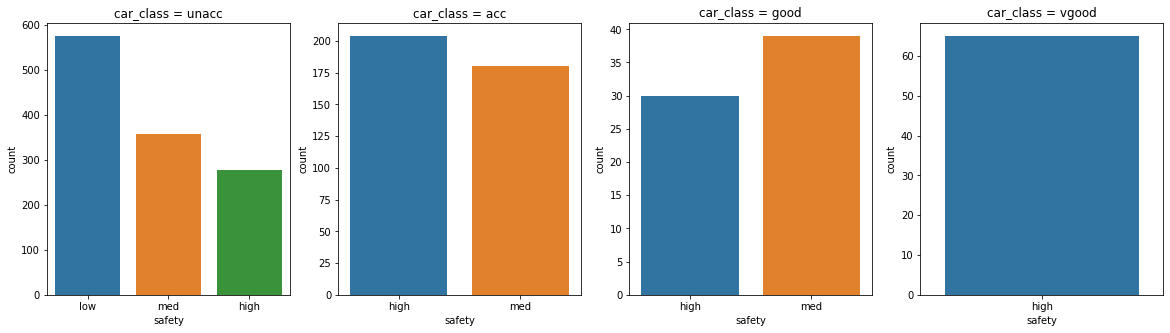

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for cur_val, subplot in zip(list(cur_class_values.index), ax):
    subplot.set_title('car_class = '+cur_val)
    sns.catplot(x='safety', kind='count', data=data.loc[data['car_class']==cur_val], ax = subplot)
    plt.close()

In [27]:
def safety_trans (x):
    if (x=='high'):
        return 3
    elif (x=='med'):
        return 2
    elif (x=='low'):
        return 1
    else:
        return np.nan

In [28]:
data['safety'] = data['safety'].apply(safety_trans)

## 3.7 Car_class target variable

In [29]:
data['car_class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: car_class, dtype: int64

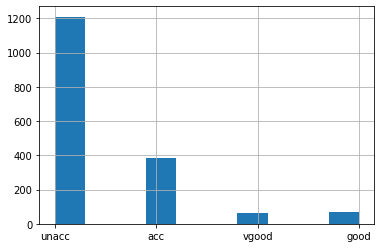

In [30]:
data['car_class'].hist()

In [31]:
def car_class_trans (x):
    if (x=='vgood'):
        return 3
    elif (x=='good'):
        return 2
    elif (x=='acc'):
        return 1
    elif (x=='unacc'):
        return 0
    else:
        return np.nan

In [32]:
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,car_class
0,4,4,1,1,1,1,unacc
1,4,4,1,1,1,2,unacc
2,4,4,1,1,1,3,unacc
3,4,4,1,1,2,1,unacc
4,4,4,1,1,2,2,unacc
5,4,4,1,1,2,3,unacc
6,4,4,1,1,3,1,unacc
7,4,4,1,1,3,2,unacc
8,4,4,1,1,3,3,unacc
9,4,4,1,2,1,1,unacc


Удивительно  «чистый» датасет. Единственный недостаток – несбалансированная целевая переменная.  И, может быть, небольшой размер выборки.

# 4 Machine learning 

## 4.1 Import packages

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

## 4.2 Quality Report function

In [34]:
def plot_confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm)
    plt.figure(figsize = (5,5))
    ax=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

## 4.3 Data Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['car_class'], axis=1),
    data['car_class'], test_size=0.3,
    stratify=data['car_class'],
    random_state=0)

## 4.4 Random Forest Model

In [36]:
rnd_clf = RandomForestClassifier(
                                    n_estimators   =1000,
                                    criterion      ='entropy',
                                    max_depth      =None,
                                    max_leaf_nodes =None,
                                    n_jobs         =-1,
                                    random_state   =42
                                )
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [37]:
print(classification_report(y_pred_rf, y_test.values))

              precision    recall  f1-score   support

         acc       0.99      0.92      0.95       124
        good       0.90      0.95      0.93        20
       unacc       0.98      1.00      0.99       356
       vgood       0.90      0.95      0.92        19

    accuracy                           0.97       519
   macro avg       0.94      0.95      0.95       519
weighted avg       0.98      0.97      0.97       519



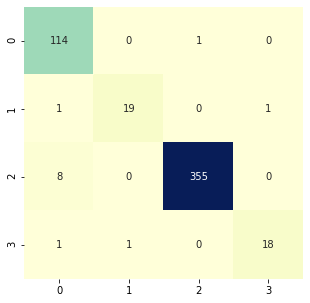

In [38]:
plot_confusion(y_test, y_pred_rf)

### 4.4.1 Feature Importance

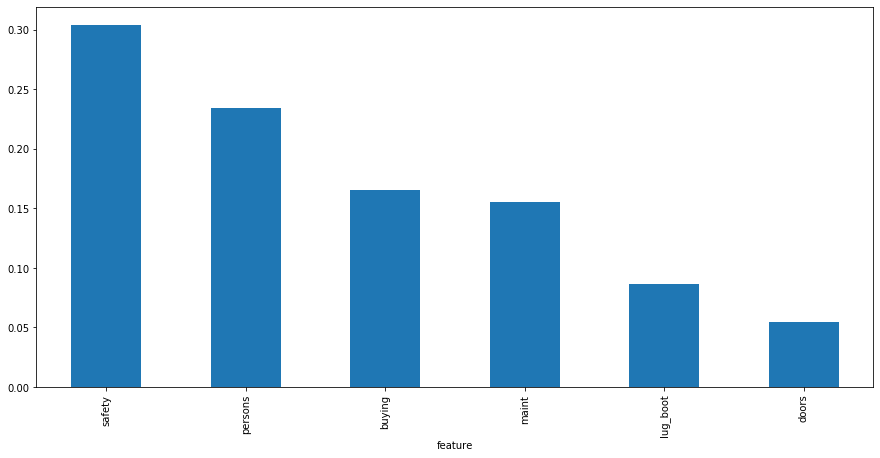

In [39]:
featureImportance = pd.DataFrame({"feature": data.drop('car_class',axis=1).columns, 
                                  "importance": rnd_clf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(15, 7));

# 5. Conclusion

Объем данный небольшой. Поэтому отменяем ограничения на количество листьев и глубину деревьев. Ограничиваем только количество деревьев.  Лучше всего, в качестве критерия, себя показала функция расчета энтропии.  
Оценка важности признаков сюрпризов не преподнесла. Все очень ценят безопасность, а вот количество дверей в машине мало кого волнует.